In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import quad
from scipy import interpolate

In [2]:
#Read in variables from AERONET Bondville for the entire year of 2017, remove missing data 

df = pd.read_csv('Desktop/20170101_20171231_BONDVILLE/20170101_20171231_BONDVILLE.ssa.csv', header = 6)

new_df = pd.DataFrame()
new_df['SSA 440'] = df['Single_Scattering_Albedo[440nm]']
new_df['SSA 675'] = df['Single_Scattering_Albedo[675nm]']
new_df['SSA 870'] = df['Single_Scattering_Albedo[870nm]']
new_df['SSA 1020'] = df['Single_Scattering_Albedo[1020nm]']

new_df['Surface Albedo 440'] = df['Surface_Albedo[440m]']
new_df['Surface Albedo 675'] = df['Surface_Albedo[675m]']
new_df['Surface Albedo 870'] = df['Surface_Albedo[870m]']
new_df['Surface Albedo 1020'] = df['Surface_Albedo[1020m]']

new_df.index = pd.to_datetime(df['Date(dd:mm:yyyy)'] + ' ' + df['Time(hh:mm:ss)'], format = '%d:%m:%Y %H:%M:%S')


new_df = new_df[new_df['SSA 1020'] > -999].dropna()

In [3]:
phase_function = pd.read_csv('Desktop/20170101_20171231_BONDVILLE.pfn.csv', header = 6)

times = phase_function['Date(dd:mm:yyyy)'].values + ' ' + phase_function['Time(hh:mm:ss)'].values
phase_function['Combined_Time'] = times
phase_function = phase_function[phase_function.Combined_Time != 'Date(dd:mm:yyyy) Time(hh:mm:ss)']

time_fixed = pd.to_datetime(phase_function['Date(dd:mm:yyyy)'].values + ' ' + phase_function['Time(hh:mm:ss)'].values, format = '%d:%m:%Y %H:%M:%S')

phase_function.index = time_fixed

In [4]:
upscatter_fraction_440_all = []
upscatter_fraction_675_all = []
upscatter_fraction_870_all = []
upscatter_fraction_1020_all = []


for i in range(new_df.shape[0]):
    sub_section_440 = phase_function.loc[new_df.index[i], '180.000000[440nm]-Total':'90.000000[440nm]-Total']
    
    angle = []
    for i in range(len(sub_section_440.columns)):
        angle_value = float(sub_section_440.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_440 = sub_section_440.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_440 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_440_all.append(I[0])
    
    

for i in range(new_df.shape[0]):
    sub_section_675 = phase_function.loc[new_df.index[i], '180.000000[675nm]-Total':'90.000000[675nm]-Total']
    
    angle = []
    for i in range(len(sub_section_675.columns)):
        angle_value = float(sub_section_675.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_675 = sub_section_675.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_675 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_675_all.append(I[0])
    
    
    
for i in range(new_df.shape[0]):
    sub_section_870 = phase_function.loc[new_df.index[i], '180.000000[870nm]-Total':'90.000000[870nm]-Total']
    
    angle = []
    for i in range(len(sub_section_870.columns)):
        angle_value = float(sub_section_870.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_870 = sub_section_870.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_870 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_870_all.append(I[0])
    
    
    
for i in range(new_df.shape[0]):
    sub_section_1020 = phase_function.loc[new_df.index[i], '180.000000[1020nm]-Total':'90.000000[1020nm]-Total']
    
    angle = []
    for i in range(len(sub_section_1020.columns)):
        angle_value = float(sub_section_1020.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_1020 = sub_section_1020.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_1020 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_1020_all.append(I[0])

In [5]:
new_df['Upscatter Fraction 440'] = upscatter_fraction_440_all
new_df['Upscatter Fraction 675'] = upscatter_fraction_675_all
new_df['Upscatter Fraction 870'] = upscatter_fraction_870_all
new_df['Upscatter Fraction 1020'] = upscatter_fraction_1020_all

In [6]:
def wc_calculator(Rs, B):
    w_critical = 2 * Rs / (2 * Rs + B * (1 - Rs)**2)
    return(w_critical)

w_critical_440 = wc_calculator(new_df['Surface Albedo 440'], new_df['Upscatter Fraction 440'])
w_critical_675 = wc_calculator(new_df['Surface Albedo 675'], new_df['Upscatter Fraction 675'])
w_critical_870 = wc_calculator(new_df['Surface Albedo 870'], new_df['Upscatter Fraction 870'])
w_critical_1020= wc_calculator(new_df['Surface Albedo 1020'], new_df['Upscatter Fraction 1020'])

new_df['Critical SSA 440'] = w_critical_440
new_df['Critical SSA 675'] = w_critical_675
new_df['Critical SSA 870'] = w_critical_870
new_df['Critical SSA 1020']= w_critical_1020

In [7]:
print('/n                                                Bondville')
new_df

/n                                                Bondville


,SSA 440,SSA 675,SSA 870,SSA 1020,Surface Albedo 440,Surface Albedo 675,Surface Albedo 870,Surface Albedo 1020,Upscatter Fraction 440,Upscatter Fraction 675,Upscatter Fraction 870,Upscatter Fraction 1020,Critical SSA 440,Critical SSA 675,Critical SSA 870,Critical SSA 1020
2017-08-03 14:11:45,0.9407,0.9049,0.8622,0.8302,0.02517,0.03939,0.52205,0.48208,0.137456,0.210740,0.280816,0.323920,0.278177,0.288313,0.942117,0.917331
2017-08-10 21:44:35,0.9310,0.9003,0.8664,0.8441,0.02669,0.04217,0.51489,0.47586,0.136636,0.241281,0.332499,0.393365,0.291982,0.275891,0.929381,0.898030
2017-09-04 12:45:30,0.9675,0.9568,0.9439,0.9343,0.04426,0.09000,0.51403,0.50869,0.164483,0.262004,0.346505,0.393638,0.370740,0.453440,0.926269,0.914582
2017-09-04 13:11:36,0.9501,0.9391,0.9242,0.9124,0.04067,0.08212,0.47791,0.47264,0.174970,0.255043,0.324294,0.361001,0.335607,0.433220,0.915348,0.903988
2017-09-04 14:08:12,0.9627,0.9524,0.9398,0.9297,0.03551,0.07078,0.42601,0.42121,0.156733,0.249052,0.340316,0.395855,0.327553,0.396967,0.883708,0.863993
2017-09-04 14:41:50,0.9653,0.9552,0.9425,0.9325,0.03363,0.06669,0.40685,0.40159,0.156444,0.262098,0.353520,0.403846,0.315244,0.368774,0.867412,0.847420
2017-09-04 14:55:28,0.9727,0.9641,0.9546,0.9475,0.03300,0.06530,0.40040,0.39524,0.156304,0.264676,0.355976,0.405814,0.311089,0.360935,0.862206,0.841921


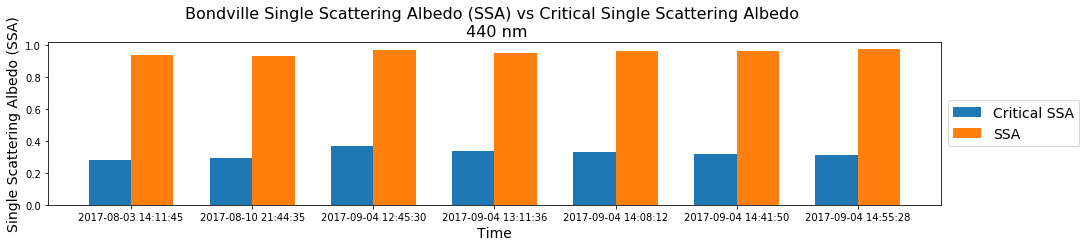

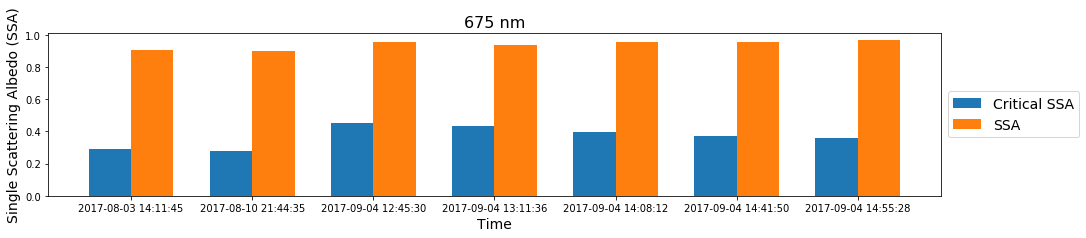

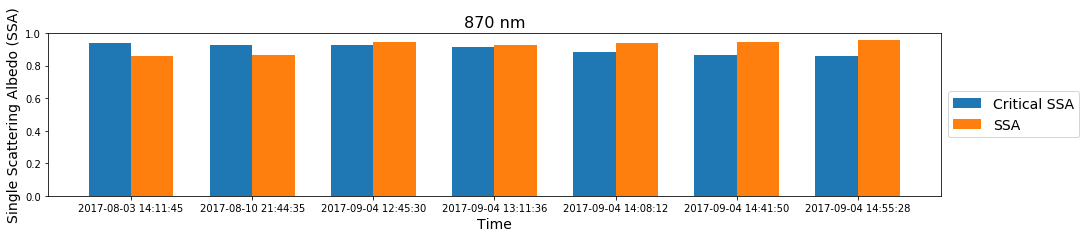

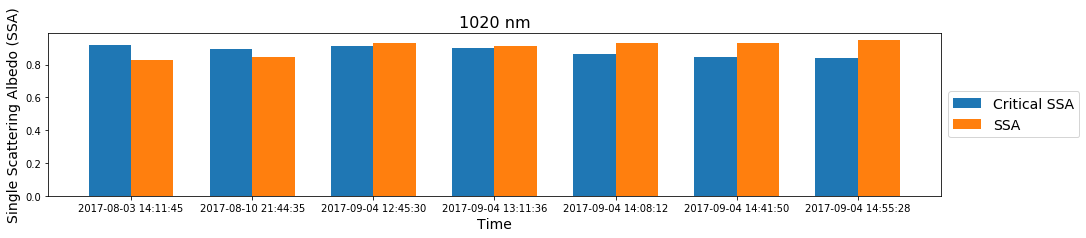

In [8]:
plt.figure(figsize = (16, 3))
one_through_seven = np.linspace(1, 7, 7)
width = 0.35 

plt.bar(one_through_seven - width/2, new_df['Critical SSA 440'], width, label = 'Critical SSA')
plt.bar(one_through_seven + width/2, new_df['SSA 440'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('Bondville Single Scattering Albedo (SSA) vs Critical Single Scattering Albedo \n 440 nm', fontsize = 16)

plt.show()




plt.figure(figsize = (16, 3))
one_through_seven = np.linspace(1, 7, 7)
width = 0.35 

plt.bar(one_through_seven - width/2, new_df['Critical SSA 675'], width, label = 'Critical SSA')
plt.bar(one_through_seven + width/2, new_df['SSA 675'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('675 nm', fontsize = 16)

plt.show()




plt.figure(figsize = (16, 3))
one_through_seven = np.linspace(1, 7, 7)
width = 0.35 

plt.bar(one_through_seven - width/2, new_df['Critical SSA 870'], width, label = 'Critical SSA')
plt.bar(one_through_seven + width/2, new_df['SSA 870'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('870 nm', fontsize = 16)

plt.show()





plt.figure(figsize = (16, 3))
one_through_seven = np.linspace(1, 7, 7)
width = 0.35 

plt.bar(one_through_seven - width/2, new_df['Critical SSA 1020'], width, label = 'Critical SSA')
plt.bar(one_through_seven + width/2, new_df['SSA 1020'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('1020 nm', fontsize = 16)

plt.show()

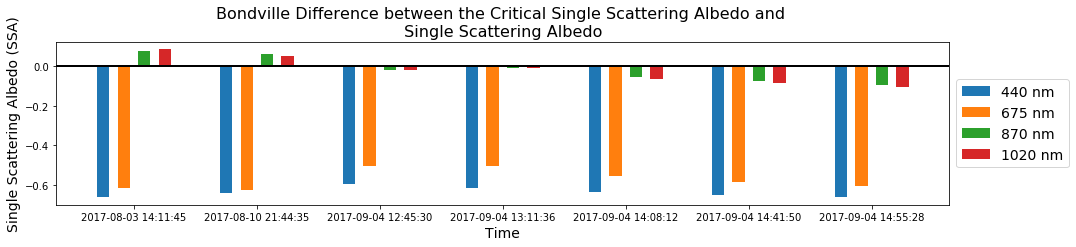

In [9]:
difference_440 = new_df['Critical SSA 440'] -  new_df['SSA 440']
difference_675 = new_df['Critical SSA 675'] -  new_df['SSA 675']
difference_870 = new_df['Critical SSA 870'] -  new_df['SSA 870']
difference_1020= new_df['Critical SSA 1020'] -  new_df['SSA 1020']


plt.figure(figsize = (16, 3))
one_through_seven = np.linspace(1, 7, 7)
width = 0.25 

plt.bar(one_through_seven- width, difference_440, .1, label = '440 nm')
plt.bar(one_through_seven- width/3, difference_675, .1, label = '675 nm')
plt.bar(one_through_seven+ width/3, difference_870, .1, label = '870 nm')
plt.bar(one_through_seven+ width, difference_1020, .1, label = '1020 nm')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('Bondville Difference between the Critical Single Scattering Albedo and \n Single Scattering Albedo ', fontsize = 16)
plt.axhline(y = 0, color = 'black', linewidth = 2)
plt.show()

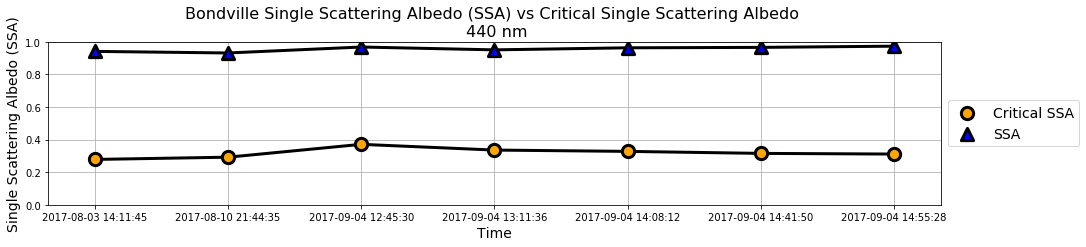

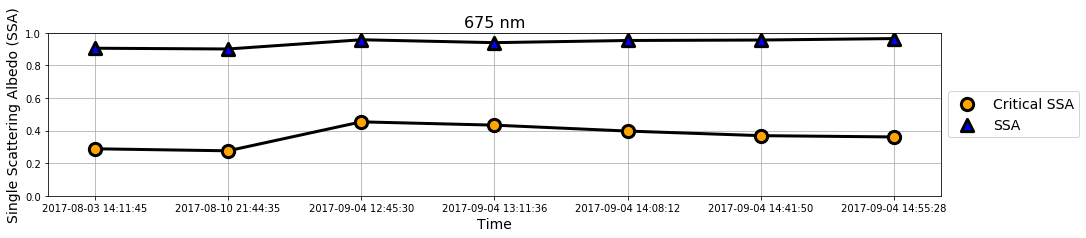

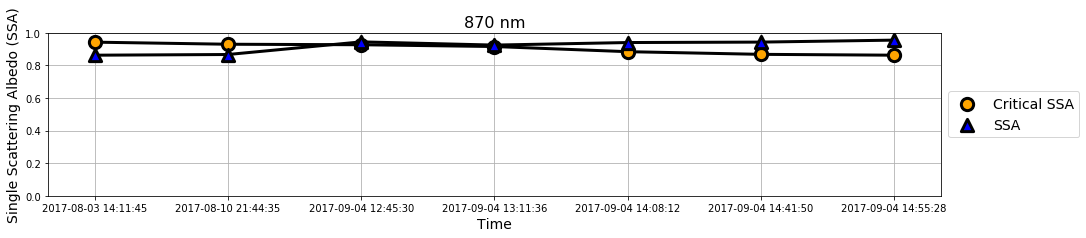

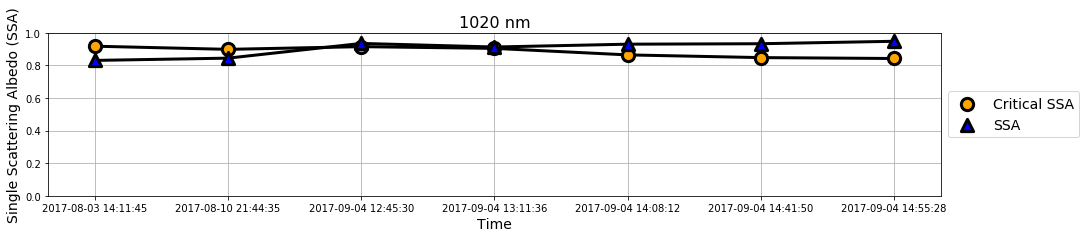

In [10]:
plt.figure(figsize = (16, 3))
plt.plot(one_through_seven, new_df['Critical SSA 440'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['Critical SSA 440'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_seven, new_df['SSA 440'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['SSA 440'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('Bondville Single Scattering Albedo (SSA) vs Critical Single Scattering Albedo \n 440 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()




plt.figure(figsize = (16, 3))
plt.plot(one_through_seven, new_df['Critical SSA 675'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['Critical SSA 675'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_seven, new_df['SSA 675'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['SSA 675'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('675 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()




plt.figure(figsize = (16, 3))
plt.plot(one_through_seven, new_df['Critical SSA 870'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['Critical SSA 870'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_seven, new_df['SSA 870'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['SSA 870'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('870 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()




plt.figure(figsize = (16, 3))
plt.plot(one_through_seven, new_df['Critical SSA 1020'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['Critical SSA 1020'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_seven, new_df['SSA 1020'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['SSA 1020'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('1020 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()

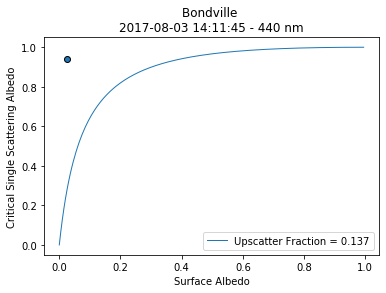

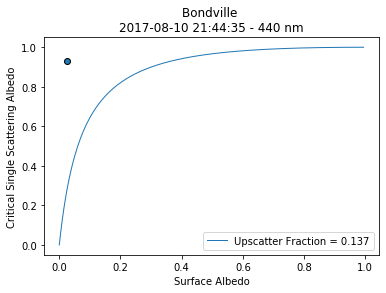

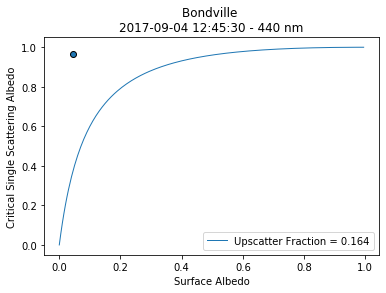

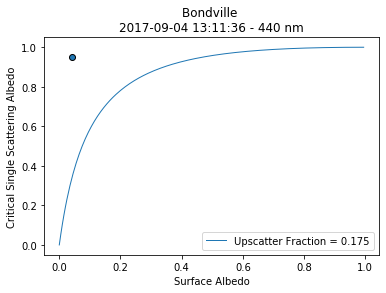

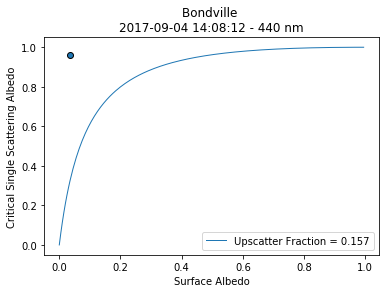

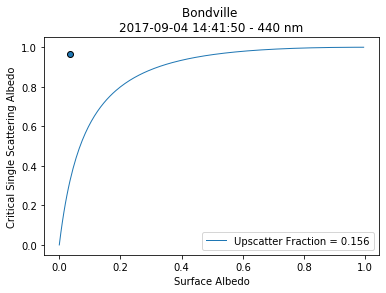

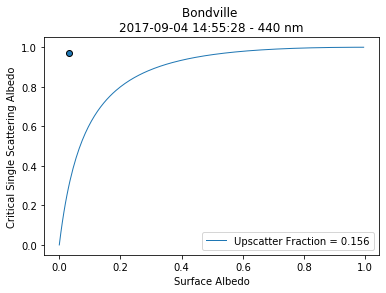

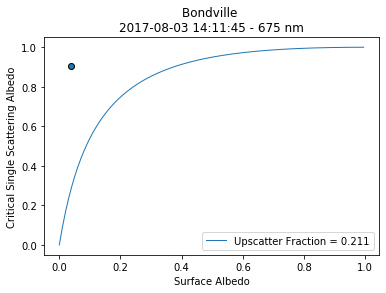

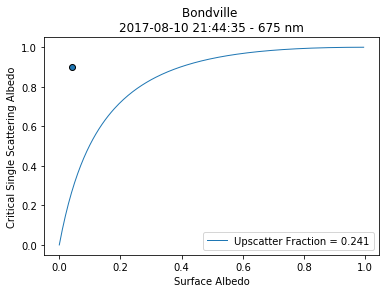

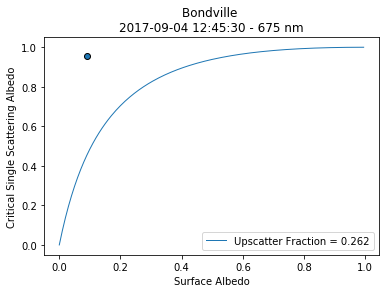

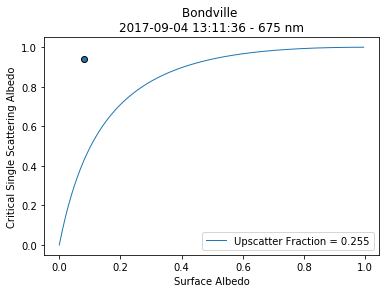

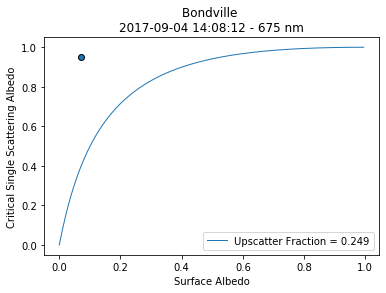

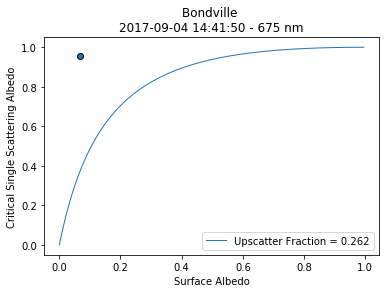

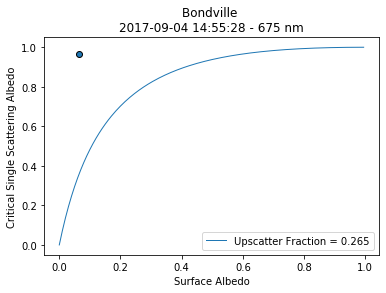

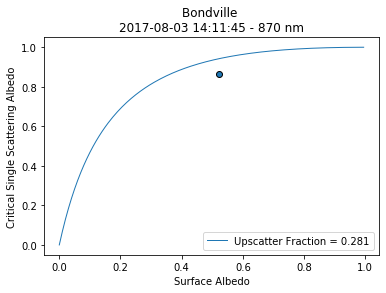

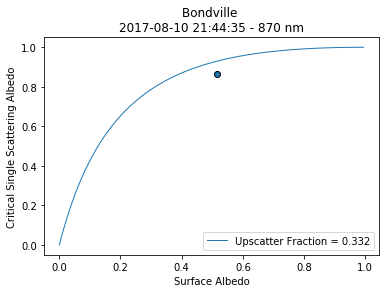

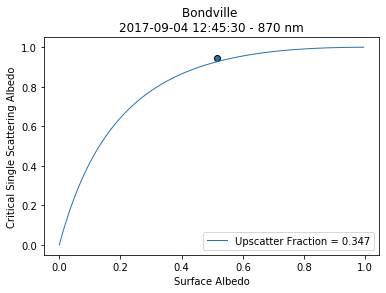

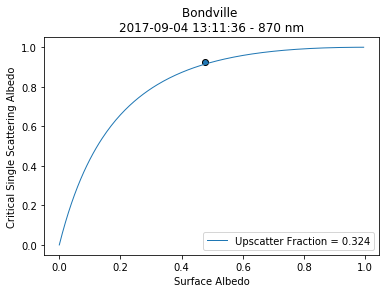

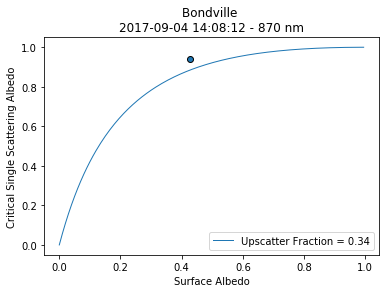

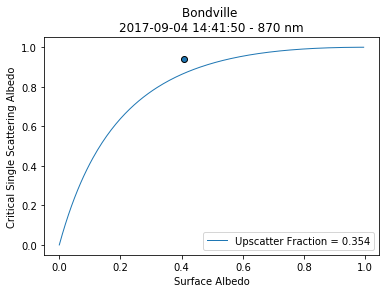

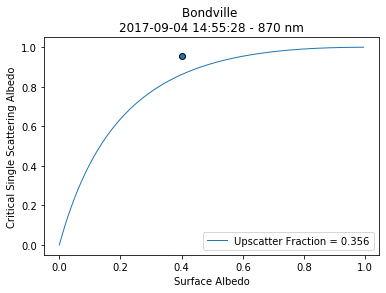

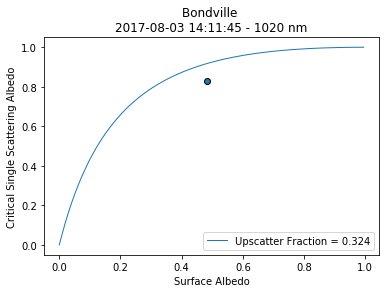

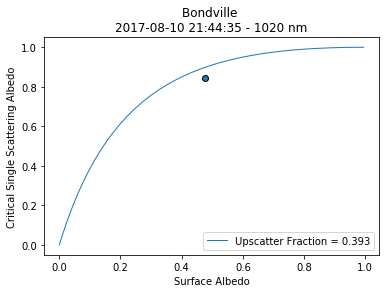

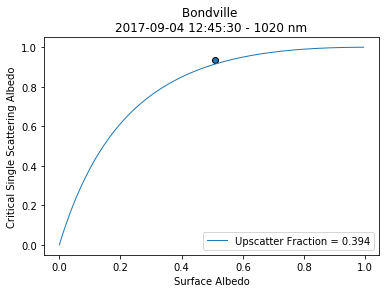

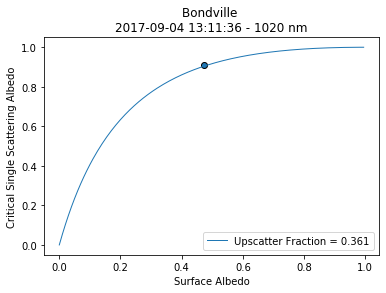

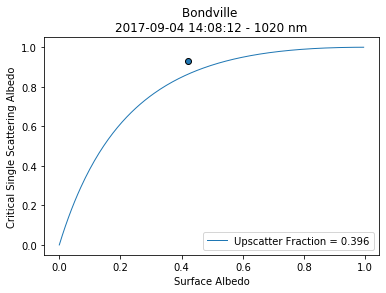

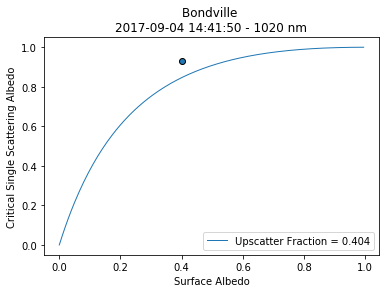

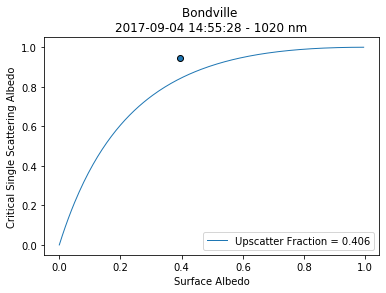

In [11]:
albedo_surface = np.arange(0, 1, .005)
B = new_df['Upscatter Fraction 440']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Bondville \n' + str(new_df.index[i]) + ' - 440 nm')
    
    plt.scatter(new_df['Surface Albedo 440'][i], new_df['SSA 440'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()
    
    
    
    
B = new_df['Upscatter Fraction 675']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Bondville \n' + str(new_df.index[i]) + ' - 675 nm')
    
    plt.scatter(new_df['Surface Albedo 675'][i], new_df['SSA 675'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()
    
    


B = new_df['Upscatter Fraction 870']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Bondville \n' + str(new_df.index[i]) + ' - 870 nm')
    
    plt.scatter(new_df['Surface Albedo 870'][i], new_df['SSA 870'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()
    
    

B = new_df['Upscatter Fraction 1020']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Bondville \n' + str(new_df.index[i]) + ' - 1020 nm')
    
    plt.scatter(new_df['Surface Albedo 1020'][i], new_df['SSA 1020'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()

In [12]:
df = pd.read_csv('Desktop/20170101_20171231_Univ_of_Nevada-Reno/20170101_20171231_Univ_of_Nevada-Reno.ssa.csv', header = 6)

new_df = pd.DataFrame()
new_df['SSA 440'] = df['Single_Scattering_Albedo[440nm]']
new_df['SSA 675'] = df['Single_Scattering_Albedo[675nm]']
new_df['SSA 870'] = df['Single_Scattering_Albedo[870nm]']
new_df['SSA 1020'] = df['Single_Scattering_Albedo[1020nm]']

new_df['Surface Albedo 440'] = df['Surface_Albedo[440m]']
new_df['Surface Albedo 675'] = df['Surface_Albedo[675m]']
new_df['Surface Albedo 870'] = df['Surface_Albedo[870m]']
new_df['Surface Albedo 1020'] = df['Surface_Albedo[1020m]']

new_df.index = pd.to_datetime(df['Date(dd:mm:yyyy)'] + ' ' + df['Time(hh:mm:ss)'], format = '%d:%m:%Y %H:%M:%S')


new_df = new_df[new_df['SSA 1020'] > -999].dropna()



phase_function = pd.read_csv('Desktop/20170101_20171231_Univ_of_Nevada-Reno/20170101_20171231_Univ_of_Nevada-Reno.pfn.csv', header = 6)

times = phase_function['Date(dd:mm:yyyy)'].values + ' ' + phase_function['Time(hh:mm:ss)'].values
phase_function['Combined_Time'] = times
phase_function = phase_function[phase_function.Combined_Time != 'Date(dd:mm:yyyy) Time(hh:mm:ss)']

time_fixed = pd.to_datetime(phase_function['Date(dd:mm:yyyy)'].values + ' ' + phase_function['Time(hh:mm:ss)'].values, format = '%d:%m:%Y %H:%M:%S')

phase_function.index = time_fixed



upscatter_fraction_440_all = []
upscatter_fraction_675_all = []
upscatter_fraction_870_all = []
upscatter_fraction_1020_all = []


for i in range(new_df.shape[0]):
    sub_section_440 = phase_function.loc[new_df.index[i], '180.000000[440nm]-Total':'90.000000[440nm]-Total']
    
    angle = []
    for i in range(len(sub_section_440.columns)):
        angle_value = float(sub_section_440.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_440 = sub_section_440.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_440 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_440_all.append(I[0])
    
    

for i in range(new_df.shape[0]):
    sub_section_675 = phase_function.loc[new_df.index[i], '180.000000[675nm]-Total':'90.000000[675nm]-Total']
    
    angle = []
    for i in range(len(sub_section_675.columns)):
        angle_value = float(sub_section_675.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_675 = sub_section_675.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_675 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_675_all.append(I[0])
    
    
    
for i in range(new_df.shape[0]):
    sub_section_870 = phase_function.loc[new_df.index[i], '180.000000[870nm]-Total':'90.000000[870nm]-Total']
    
    angle = []
    for i in range(len(sub_section_870.columns)):
        angle_value = float(sub_section_870.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_870 = sub_section_870.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_870 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_870_all.append(I[0])
    
    
    
for i in range(new_df.shape[0]):
    sub_section_1020 = phase_function.loc[new_df.index[i], '180.000000[1020nm]-Total':'90.000000[1020nm]-Total']
    
    angle = []
    for i in range(len(sub_section_1020.columns)):
        angle_value = float(sub_section_1020.columns[i][0:9])
        angle.append(angle_value)
        
    sub_section_1020 = sub_section_1020.values[0].astype(float)

    f = interpolate.interp1d(np.array(angle) * math.pi / 180, sub_section_1020 * np.sin(np.array(angle).astype(float) * math.pi / 180), kind = 'cubic', fill_value = 'extrapolate')
    I = quad(f, math.pi/2, math.pi)
    
    upscatter_fraction_1020_all.append(I[0])

In [13]:
new_df['Upscatter Fraction 440'] = upscatter_fraction_440_all
new_df['Upscatter Fraction 675'] = upscatter_fraction_675_all
new_df['Upscatter Fraction 870'] = upscatter_fraction_870_all
new_df['Upscatter Fraction 1020'] = upscatter_fraction_1020_all

w_critical_440 = wc_calculator(new_df['Surface Albedo 440'], new_df['Upscatter Fraction 440'])
w_critical_675 = wc_calculator(new_df['Surface Albedo 675'], new_df['Upscatter Fraction 675'])
w_critical_870 = wc_calculator(new_df['Surface Albedo 870'], new_df['Upscatter Fraction 870'])
w_critical_1020= wc_calculator(new_df['Surface Albedo 1020'], new_df['Upscatter Fraction 1020'])

new_df['Critical SSA 440'] = w_critical_440
new_df['Critical SSA 675'] = w_critical_675
new_df['Critical SSA 870'] = w_critical_870
new_df['Critical SSA 1020']= w_critical_1020


print('/n                                                Reno')
new_df

/n                                                Reno


,SSA 440,SSA 675,SSA 870,SSA 1020,Surface Albedo 440,Surface Albedo 675,Surface Albedo 870,Surface Albedo 1020,Upscatter Fraction 440,Upscatter Fraction 675,Upscatter Fraction 870,Upscatter Fraction 1020,Critical SSA 440,Critical SSA 675,Critical SSA 870,Critical SSA 1020
2017-08-20 15:59:02,0.9602,0.9484,0.9364,0.9282,0.07021,0.12946,0.26066,0.26168,0.157634,0.289741,0.352526,0.373846,0.507488,0.541111,0.730121,0.719742
2017-09-01 14:48:35,0.9476,0.9327,0.9165,0.9022,0.07974,0.14723,0.30538,0.30537,0.157057,0.281800,0.358759,0.388113,0.545253,0.589639,0.779170,0.765330
2017-09-01 15:14:22,0.9529,0.9390,0.9231,0.9095,0.07526,0.13945,0.28500,0.28558,0.170678,0.286323,0.354083,0.378337,0.507700,0.568099,0.758972,0.747336
2017-09-01 16:09:53,0.9565,0.9444,0.9303,0.9195,0.06888,0.12850,0.25592,0.25765,0.179263,0.317137,0.386922,0.414570,0.469884,0.516200,0.704954,0.692829
2017-09-01 16:43:00,0.9553,0.9421,0.9282,0.9144,0.06648,0.12444,0.24484,0.24705,0.178546,0.307071,0.376042,0.400602,0.460778,0.513915,0.695446,0.685094
2017-09-01 17:01:57,0.9683,0.9592,0.9487,0.9407,0.06542,0.12266,0.23990,0.24237,0.191707,0.325870,0.389633,0.415759,0.438641,0.494447,0.680653,0.670098


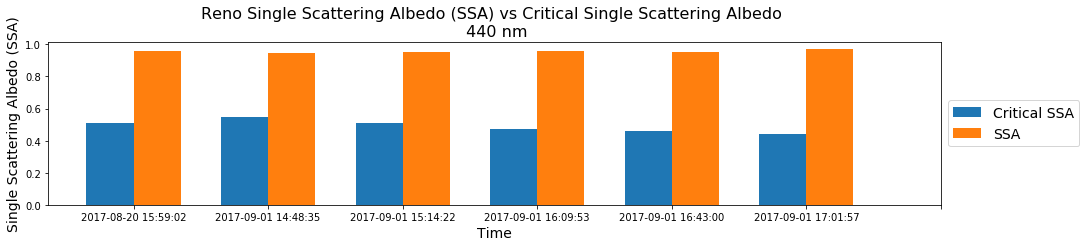

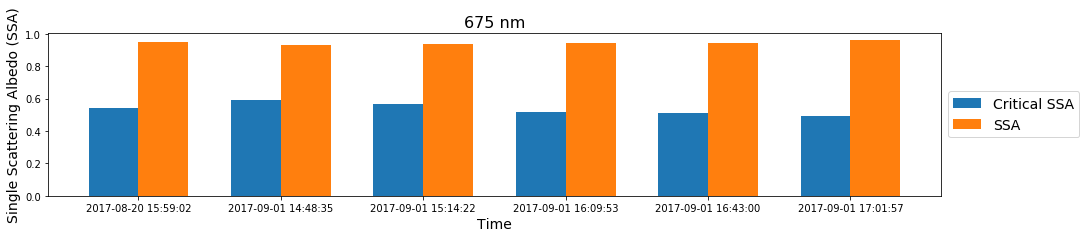

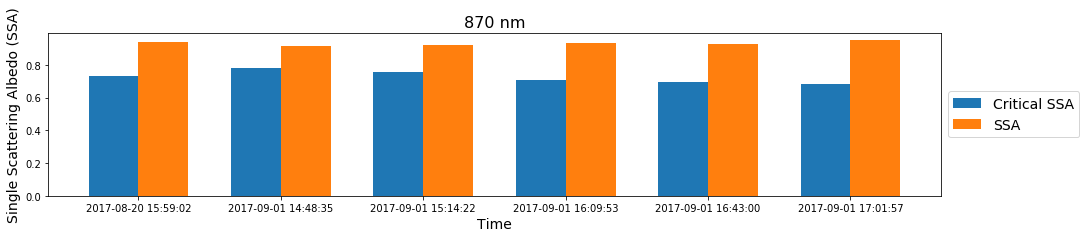

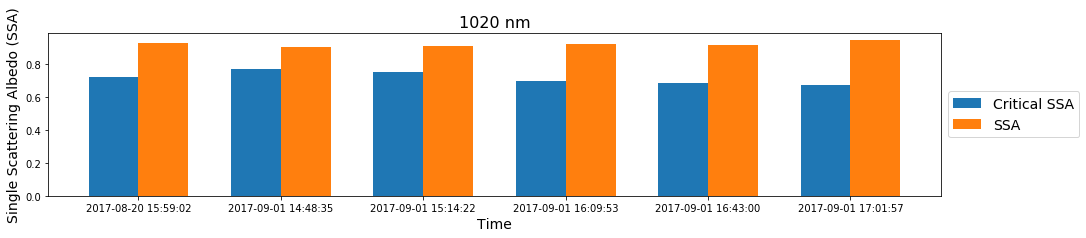

In [14]:
plt.figure(figsize = (16, 3))
one_through_six = np.linspace(1, 6, 6)
width = 0.35 

plt.bar(one_through_six - width/2, new_df['Critical SSA 440'], width, label = 'Critical SSA')
plt.bar(one_through_six + width/2, new_df['SSA 440'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('Reno Single Scattering Albedo (SSA) vs Critical Single Scattering Albedo \n 440 nm', fontsize = 16)

plt.show()




plt.figure(figsize = (16, 3))
one_through_seven = np.linspace(1, 6, 6)
width = 0.35 

plt.bar(one_through_six - width/2, new_df['Critical SSA 675'], width, label = 'Critical SSA')
plt.bar(one_through_six + width/2, new_df['SSA 675'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('675 nm', fontsize = 16)

plt.show()




plt.figure(figsize = (16, 3))
one_through_six = np.linspace(1, 6, 6)
width = 0.35 

plt.bar(one_through_six - width/2, new_df['Critical SSA 870'], width, label = 'Critical SSA')
plt.bar(one_through_six + width/2, new_df['SSA 870'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('870 nm', fontsize = 16)

plt.show()





plt.figure(figsize = (16, 3))
one_through_six = np.linspace(1, 6, 6)
width = 0.35 

plt.bar(one_through_six - width/2, new_df['Critical SSA 1020'], width, label = 'Critical SSA')
plt.bar(one_through_six + width/2, new_df['SSA 1020'], width, label = 'SSA')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('1020 nm', fontsize = 16)

plt.show()

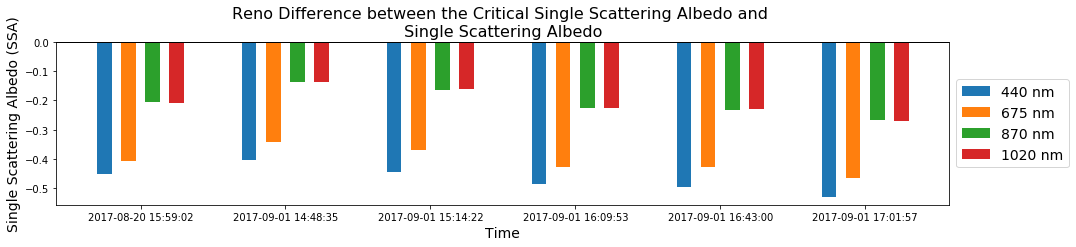

In [15]:
difference_440 = new_df['Critical SSA 440'] -  new_df['SSA 440']
difference_675 = new_df['Critical SSA 675'] -  new_df['SSA 675']
difference_870 = new_df['Critical SSA 870'] -  new_df['SSA 870']
difference_1020= new_df['Critical SSA 1020'] -  new_df['SSA 1020']


plt.figure(figsize = (16, 3))
one_through_six = np.linspace(1, 6, 6)
width = 0.25 

plt.bar(one_through_six- width, difference_440, .1, label = '440 nm')
plt.bar(one_through_six- width/3, difference_675, .1, label = '675 nm')
plt.bar(one_through_six+ width/3, difference_870, .1, label = '870 nm')
plt.bar(one_through_six+ width, difference_1020, .1, label = '1020 nm')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_six, LABELS)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('Reno Difference between the Critical Single Scattering Albedo and \n Single Scattering Albedo ', fontsize = 16)
plt.axhline(y = 0, color = 'black', linewidth = 2)
plt.show()

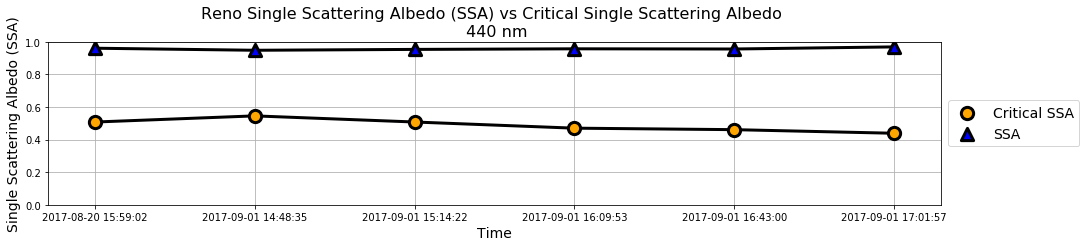

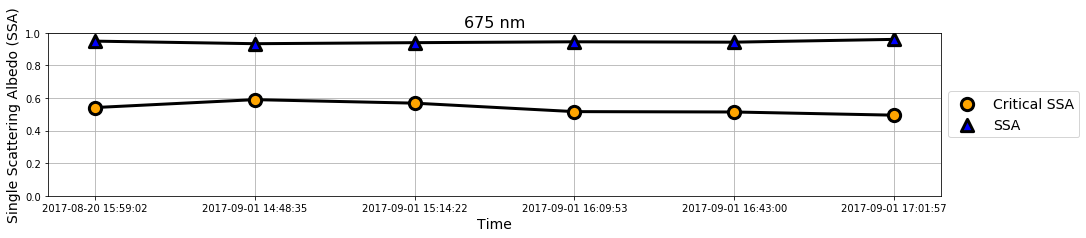

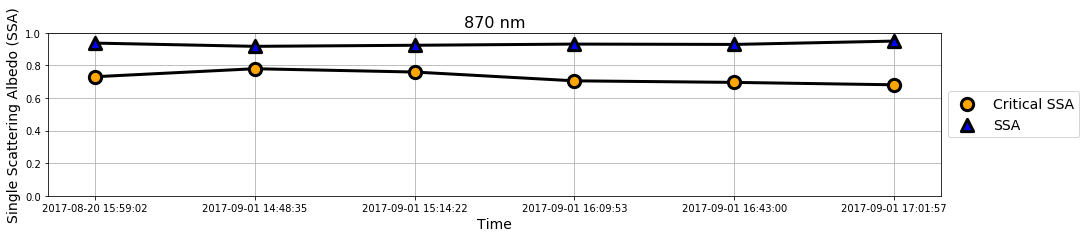

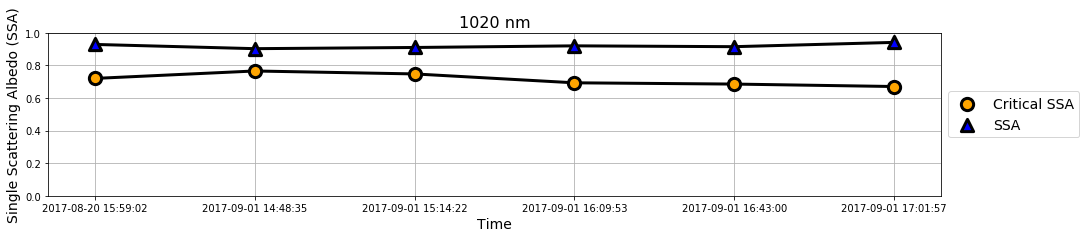

In [16]:
plt.figure(figsize = (16, 3))
plt.plot(one_through_six, new_df['Critical SSA 440'], color = 'black', linewidth = 3)
plt.scatter(one_through_six, new_df['Critical SSA 440'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_six, new_df['SSA 440'], color = 'black', linewidth = 3)
plt.scatter(one_through_six, new_df['SSA 440'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_six, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('Reno Single Scattering Albedo (SSA) vs Critical Single Scattering Albedo \n 440 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()




plt.figure(figsize = (16, 3))
plt.plot(one_through_six, new_df['Critical SSA 675'], color = 'black', linewidth = 3)
plt.scatter(one_through_six, new_df['Critical SSA 675'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_six, new_df['SSA 675'], color = 'black', linewidth = 3)
plt.scatter(one_through_six, new_df['SSA 675'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('675 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()




plt.figure(figsize = (16, 3))
plt.plot(one_through_six, new_df['Critical SSA 870'], color = 'black', linewidth = 3)
plt.scatter(one_through_six, new_df['Critical SSA 870'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_seven, new_df['SSA 870'], color = 'black', linewidth = 3)
plt.scatter(one_through_seven, new_df['SSA 870'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('870 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()




plt.figure(figsize = (16, 3))
plt.plot(one_through_six, new_df['Critical SSA 1020'], color = 'black', linewidth = 3)
plt.scatter(one_through_six, new_df['Critical SSA 1020'], color = 'orange', linewidth = 3, marker='o', zorder = 10, s = 150, edgecolors = 'black', label = 'Critical SSA')

plt.plot(one_through_six, new_df['SSA 1020'], color = 'black', linewidth = 3)
plt.scatter(one_through_six, new_df['SSA 1020'], color = 'blue', linewidth = 3, marker='^', zorder = 10, s = 150, edgecolors = 'black', label = 'SSA')

plt.ylim(0, 1)

LABELS = new_df.index.astype(str)
plt.xticks(one_through_seven, LABELS)

plt.grid(True)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('Single Scattering Albedo (SSA)', fontsize = 14)

plt.title('1020 nm', fontsize = 16)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

plt.show()

In [17]:
new_df

,SSA 440,SSA 675,SSA 870,SSA 1020,Surface Albedo 440,Surface Albedo 675,Surface Albedo 870,Surface Albedo 1020,Upscatter Fraction 440,Upscatter Fraction 675,Upscatter Fraction 870,Upscatter Fraction 1020,Critical SSA 440,Critical SSA 675,Critical SSA 870,Critical SSA 1020
2017-08-20 15:59:02,0.9602,0.9484,0.9364,0.9282,0.07021,0.12946,0.26066,0.26168,0.157634,0.289741,0.352526,0.373846,0.507488,0.541111,0.730121,0.719742
2017-09-01 14:48:35,0.9476,0.9327,0.9165,0.9022,0.07974,0.14723,0.30538,0.30537,0.157057,0.281800,0.358759,0.388113,0.545253,0.589639,0.779170,0.765330
2017-09-01 15:14:22,0.9529,0.9390,0.9231,0.9095,0.07526,0.13945,0.28500,0.28558,0.170678,0.286323,0.354083,0.378337,0.507700,0.568099,0.758972,0.747336
2017-09-01 16:09:53,0.9565,0.9444,0.9303,0.9195,0.06888,0.12850,0.25592,0.25765,0.179263,0.317137,0.386922,0.414570,0.469884,0.516200,0.704954,0.692829
2017-09-01 16:43:00,0.9553,0.9421,0.9282,0.9144,0.06648,0.12444,0.24484,0.24705,0.178546,0.307071,0.376042,0.400602,0.460778,0.513915,0.695446,0.685094
2017-09-01 17:01:57,0.9683,0.9592,0.9487,0.9407,0.06542,0.12266,0.23990,0.24237,0.191707,0.325870,0.389633,0.415759,0.438641,0.494447,0.680653,0.670098


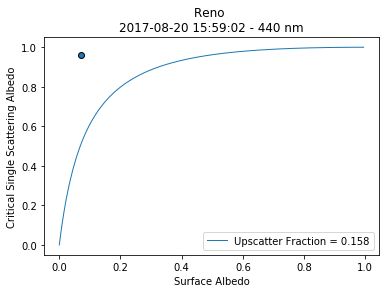

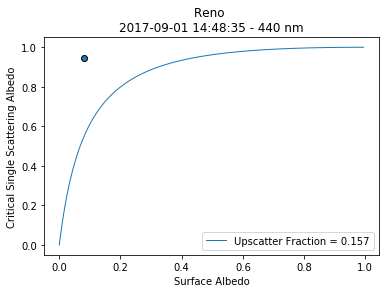

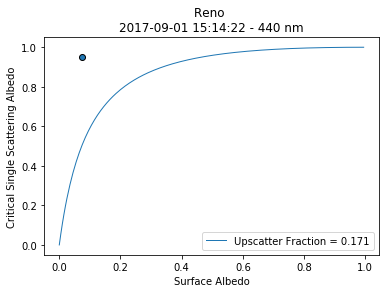

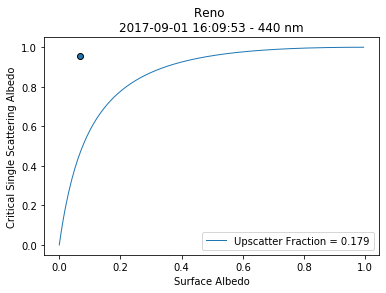

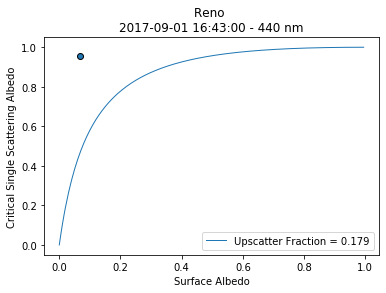

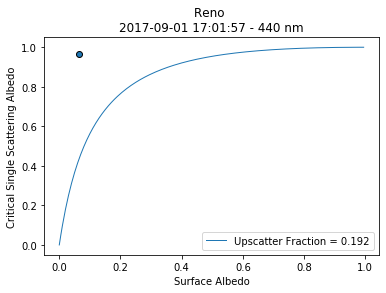

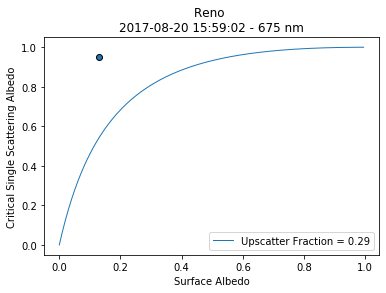

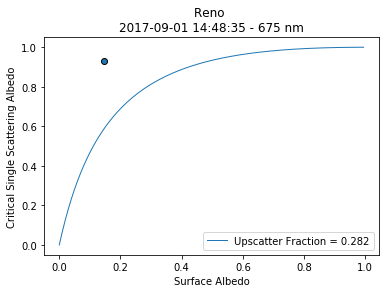

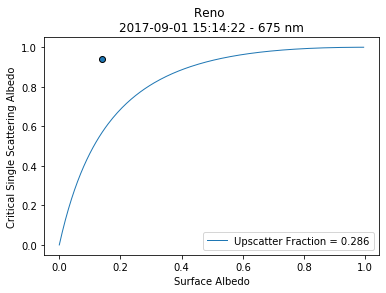

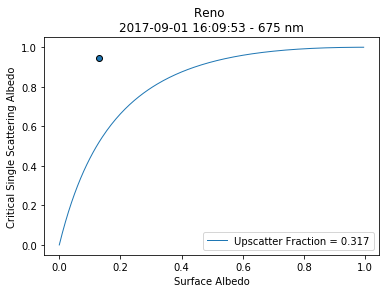

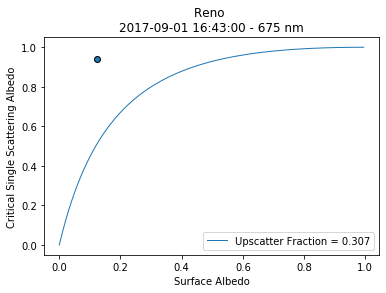

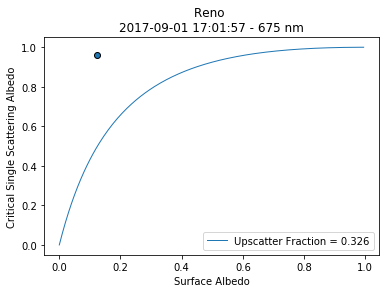

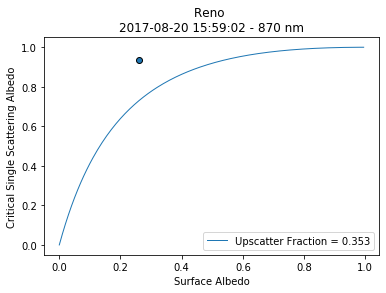

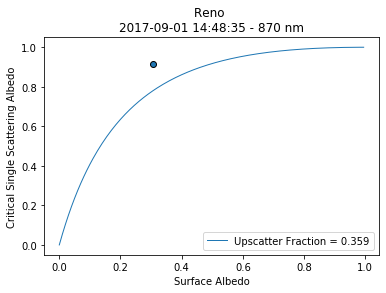

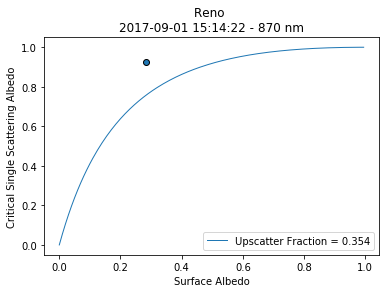

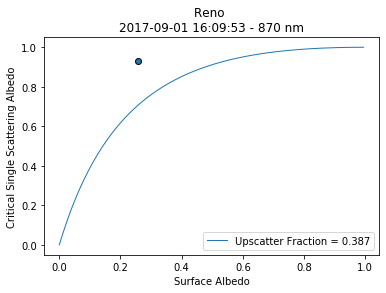

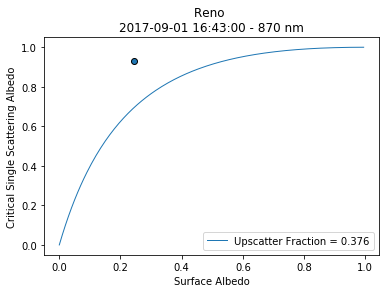

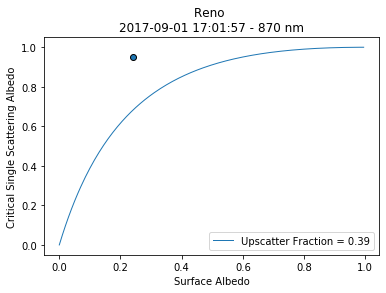

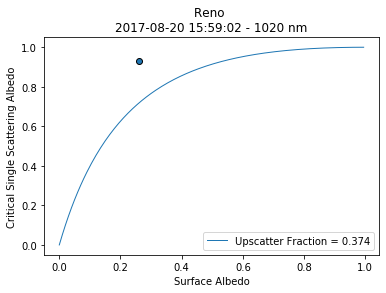

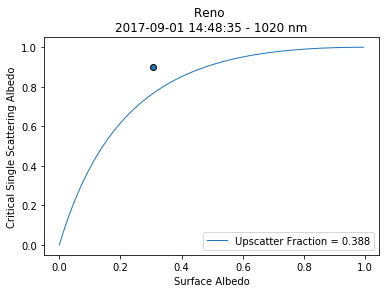

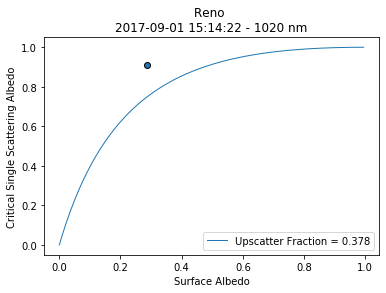

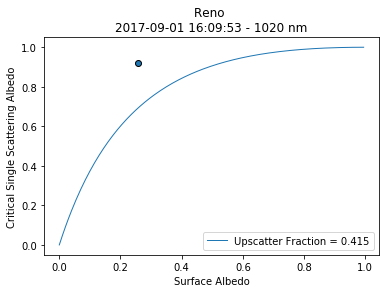

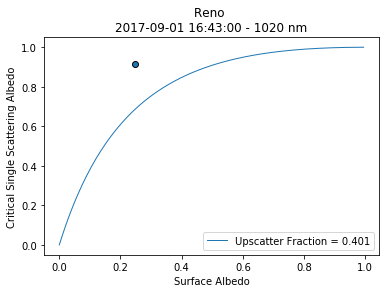

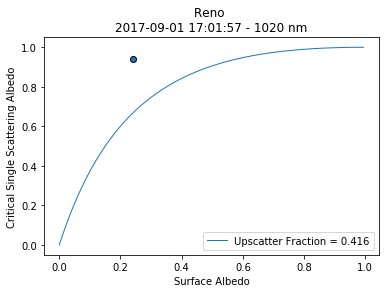

In [18]:
albedo_surface = np.arange(0, 1, .005)
B = new_df['Upscatter Fraction 440']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Reno \n' + str(new_df.index[i]) + ' - 440 nm')
    
    plt.scatter(new_df['Surface Albedo 440'][i], new_df['SSA 440'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()
    
    
    
    
B = new_df['Upscatter Fraction 675']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Reno \n' + str(new_df.index[i]) + ' - 675 nm')
    
    plt.scatter(new_df['Surface Albedo 675'][i], new_df['SSA 675'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()
    
    


B = new_df['Upscatter Fraction 870']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Reno \n' + str(new_df.index[i]) + ' - 870 nm')
    
    plt.scatter(new_df['Surface Albedo 870'][i], new_df['SSA 870'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()
    
    

B = new_df['Upscatter Fraction 1020']

for i in range(len(B)):
    w_critical = 2 * albedo_surface / (2 * albedo_surface + B[i] * (1 - albedo_surface)**2)
    
    
    plt.plot(albedo_surface, w_critical, linewidth = 1, label = 'Upscatter Fraction = ' + str(round(B[i], 3)))
    plt.xlabel('Surface Albedo')
    plt.ylabel('Critical Single Scattering Albedo')
    
    plt.title('Reno \n' + str(new_df.index[i]) + ' - 1020 nm')
    
    plt.scatter(new_df['Surface Albedo 1020'][i], new_df['SSA 1020'][i],  edgecolors = 'black')
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    plt.show()